In [ ]:
#import Dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
import random

In [ ]:
# Load Dataset
housing = fetch_california_housing()
X_raw = housing.data
y = housing.target

In [ ]:
# Feature preprocessing and data preparation

# Set random seed
np.random.seed(42)
random.seed(42)

# Normalize features
X_mean = np.mean(X_raw, axis=0)
X_std = np.std(X_raw, axis=0)
X_normal = (X_raw - X_mean) / X_std

# Add bias term
X = np.column_stack([np.ones(X_raw.shape[0]), X_normal])
print(X[:, 0])

[1. 1. 1. ... 1. 1. 1.]


In [ ]:
#Data splitting

n_samples = X.shape[0]
indices = np.random.permutation(n_samples)

# Split: 60% train, 20% validation, 20% test
train_size = int(0.6 * n_samples)
val_size = int(0.2 * n_samples)

#Split indices for train, validation, and test sets
train_idx = indices[:train_size]
val_idx = indices[train_size:train_size + val_size]
test_idx = indices[train_size + val_size:]

#Use indices to extract actual data
X_train, y_train = X[train_idx], y[train_idx]
X_val, y_val = X[val_idx], y[val_idx]
X_test, y_test = X[test_idx], y[test_idx]

In [ ]:
#Learning Parameters

#Predictions using learned parameters
def predict(X, theta):
    return np.dot(X, theta)

#Calculate MSE
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


In [ ]:
# Normal Equation
def normal_equation(X, y):
    # theta = (X^T X)^(-1) X^T y
    XtX = np.matmul(X.T, X)
    Xty = np.matmul(X.T, y)
    theta = np.linalg.solve(XtX, Xty)
    return theta

# Train normal equation
theta_normal = normal_equation(X_train, y_train)

#Predictions
y_train_pred_normal = predict(X_train, theta_normal)
y_val_pred_normal = predict(X_val, theta_normal)
y_test_pred_normal = predict(X_test, theta_normal)

#Calculate errors
mse_train_normal = mse(y_train, y_train_pred_normal)
mse_val_normal = mse(y_val, y_val_pred_normal)
mse_test_normal = mse(y_test, y_test_pred_normal)

print(f"Normal Equation")
print(f"Train MSE {mse_train_normal:f}")
print(f"Validation MSE {mse_val_normal:f}")
print(f"Test MSE {mse_test_normal:f}")

Normal Equation
Train MSE 0.521417
Validation MSE 0.907481
Test MSE 0.616203


In [ ]:
#Stochastic Gradient Descent implementation

class SGDLinearRegression:
    def __init__(self, learning_rate=0.05, n_epochs=800, decay=0.0005):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.decay = decay
        self.theta = None
        self.train_losses = []
        self.val_losses = []

    def fit(self, X_train, y_train, X_val=None, y_val=None):
        n_samples, n_features = X_train.shape

        # initialize with 0
        self.theta = np.zeros(n_features)

        for epoch in range(self.n_epochs):
            # learning rate decay
            curr_lr = self.learning_rate / (1 + self.decay * epoch)

            for i in range(n_samples):
                xi = X_train[i]
                yi = y_train[i]
                pred = np.dot(xi, self.theta) # prediction
                grad = (pred - yi) * xi # gradient
                self.theta -= curr_lr * grad

            # record losses each epoch
            train_pred = self.predict(X_train)
            train_loss = mse(y_train, train_pred)
            self.train_losses.append(train_loss)

            if X_val is not None and y_val is not None:
                val_pred = self.predict(X_val)
                val_loss = mse(y_val, val_pred)
                self.val_losses.append(val_loss)

    def predict(self, X):
        return np.dot(X, self.theta)

In [ ]:
#Training SGD model
sgd_model = SGDLinearRegression(learning_rate=0.00001, n_epochs=1000)
sgd_model.fit(X_train, y_train, X_val, y_val)

#Predictions
y_train_pred_sgd = sgd_model.predict(X_train)
y_val_pred_sgd = sgd_model.predict(X_val)
y_test_pred_sgd = sgd_model.predict(X_test)

#Calculate errors
mse_train_sgd = mse(y_train, y_train_pred_sgd)
mse_val_sgd = mse(y_val, y_val_pred_sgd)
mse_test_sgd = mse(y_test, y_test_pred_sgd)
print(f"Stochastic Gradient Descent")
print(f"Train MSE {mse_train_sgd:f}")
print(f"Validation MSE {mse_val_sgd:f}")
print(f"Test MSE {mse_test_sgd:f}")


Stochastic Gradient Descent
Train MSE 0.521419
Validation MSE 0.903826
Test MSE 0.615921


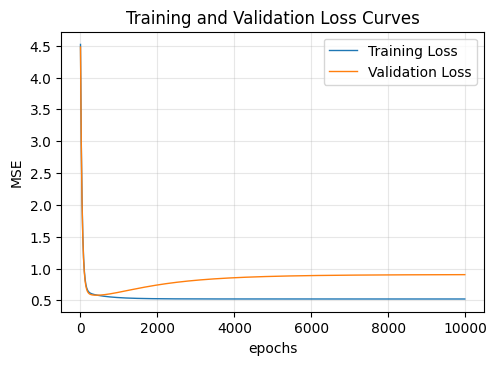

In [ ]:
#Plotting training and validation loss curves
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
epochs = np.arange(0, len(sgd_model.train_losses)) * 10
plt.plot(epochs, sgd_model.train_losses, label='Training Loss', linewidth=1)
plt.plot(epochs, sgd_model.val_losses, label='Validation Loss', linewidth=1)
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.grid(True, alpha=0.3)

